In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "campania"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,15,Campania,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,15,Campania,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,15,Campania,2,0,2,1,3,3,3,...,0.0,0.0,0.0,1.0,0.00,66.67,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,15,Campania,2,0,2,2,4,1,1,...,0.0,203.0,0.0,1.0,0.00,50.00,0.49,0.00,0.00,33.33
4,2020-02-29T17:00:00,15,Campania,3,0,3,10,13,9,9,...,0.0,160.0,0.0,8.0,0.00,23.08,5.62,0.00,0.00,225.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2020-11-25T17:00:00,15,Campania,2282,192,2474,99674,102148,-703,2815,...,47.0,23130.0,16937.0,-702.0,7.76,2.42,12.17,16.62,-4.48,-0.68
275,2020-11-26T17:00:00,15,Campania,2212,200,2412,100972,103384,1236,3008,...,49.0,23761.0,11352.0,1298.0,8.29,2.33,12.66,26.50,4.17,1.21
276,2020-11-27T17:00:00,15,Campania,2188,184,2372,101610,103982,598,2924,...,63.0,22301.0,14597.0,638.0,7.76,2.28,13.11,20.03,-8.00,0.58
277,2020-11-28T17:00:00,15,Campania,2164,186,2350,102033,104383,401,2729,...,49.0,22007.0,14374.0,423.0,7.91,2.25,12.40,18.99,1.09,0.39


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 29, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2022
Nuovi tamponi: 19063.0
Percentuale nuovi positivi/nuovi tamponi: 10.6 %
Nuovi guariti: 1583.0
Nuovi deceduti: 36.0
Variazione positivi ricoverati con sintomi: 1.0
Variazione positivi in terapia intensiva: -3.0
Variazione positivi in isolamento dimiciliare: 405.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 29, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-30T17:00:00,15,Campania,414,39,453,5660,6113,148,287,...,0.0,5584.0,4962.0,147.0,8.61,7.41,5.14,5.78,11.43,2.48
1,2020-10-01T17:00:00,15,Campania,421,38,459,5937,6396,283,390,...,0.0,8311.0,7475.0,277.0,8.28,7.18,4.69,5.22,-2.56,4.63
2,2020-10-02T17:00:00,15,Campania,439,39,478,6267,6745,349,392,...,1.0,8482.0,6152.0,330.0,8.16,7.09,4.62,6.37,2.63,5.46
3,2020-10-03T17:00:00,15,Campania,434,40,474,6568,7042,297,401,...,1.0,7498.0,5641.0,301.0,8.44,6.73,5.35,7.11,2.56,4.40
4,2020-10-04T17:00:00,15,Campania,450,41,491,6909,7400,358,412,...,0.0,7250.0,5764.0,341.0,8.35,6.64,5.68,7.15,2.50,5.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-25T17:00:00,15,Campania,2282,192,2474,99674,102148,-703,2815,...,47.0,23130.0,16937.0,-702.0,7.76,2.42,12.17,16.62,-4.48,-0.68
57,2020-11-26T17:00:00,15,Campania,2212,200,2412,100972,103384,1236,3008,...,49.0,23761.0,11352.0,1298.0,8.29,2.33,12.66,26.50,4.17,1.21
58,2020-11-27T17:00:00,15,Campania,2188,184,2372,101610,103982,598,2924,...,63.0,22301.0,14597.0,638.0,7.76,2.28,13.11,20.03,-8.00,0.58
59,2020-11-28T17:00:00,15,Campania,2164,186,2350,102033,104383,401,2729,...,49.0,22007.0,14374.0,423.0,7.91,2.25,12.40,18.99,1.09,0.39


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

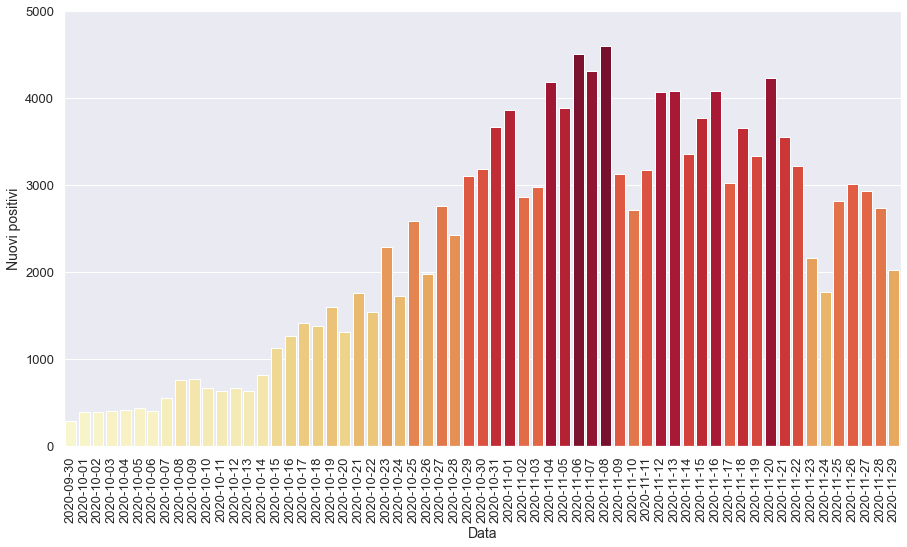

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

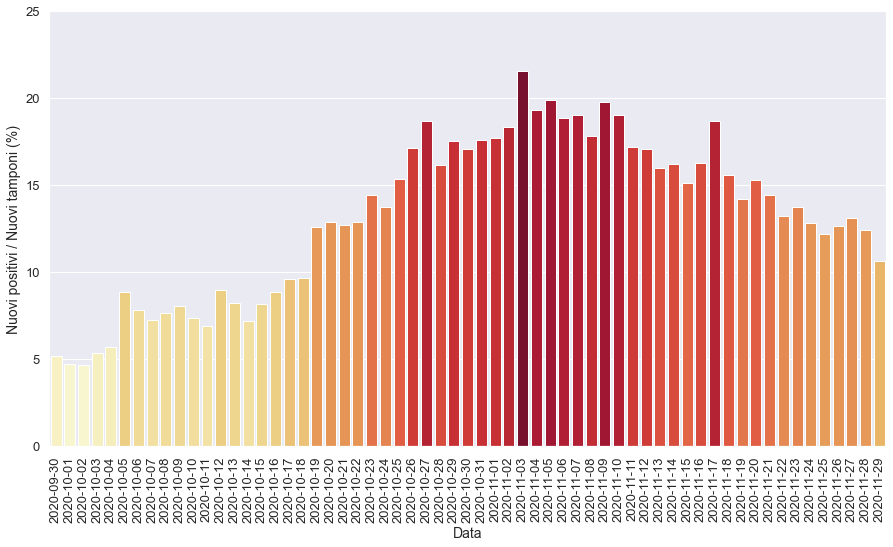

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

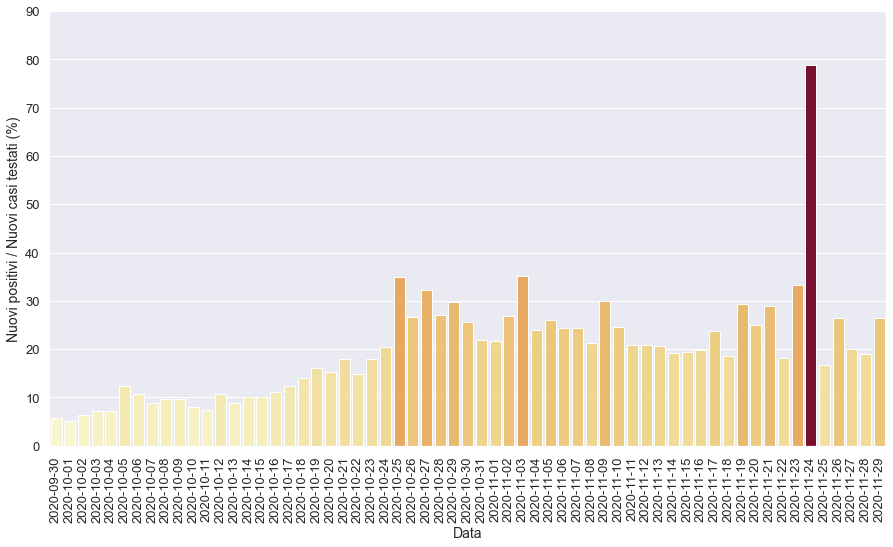

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

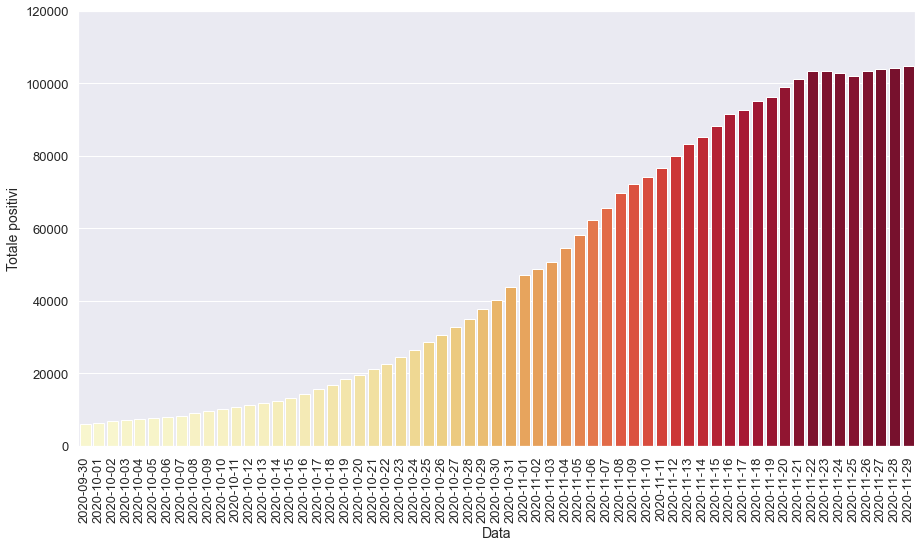

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

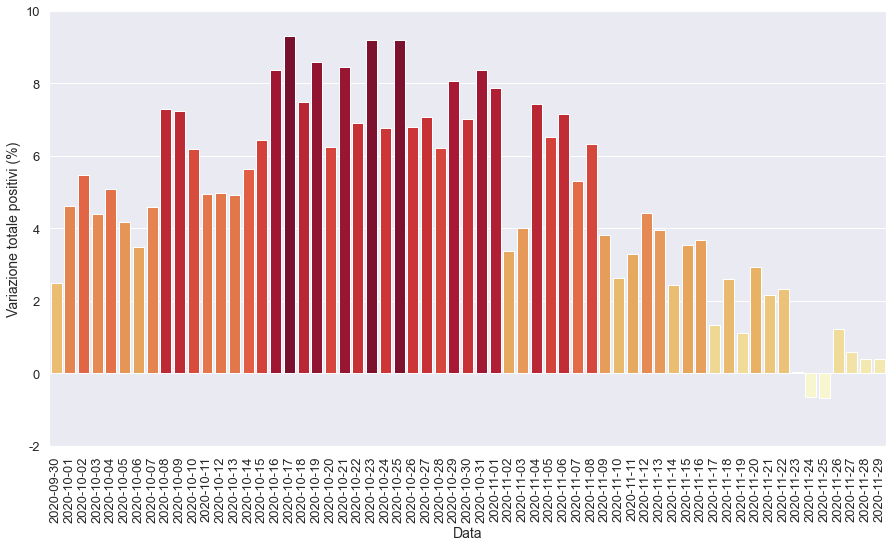

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

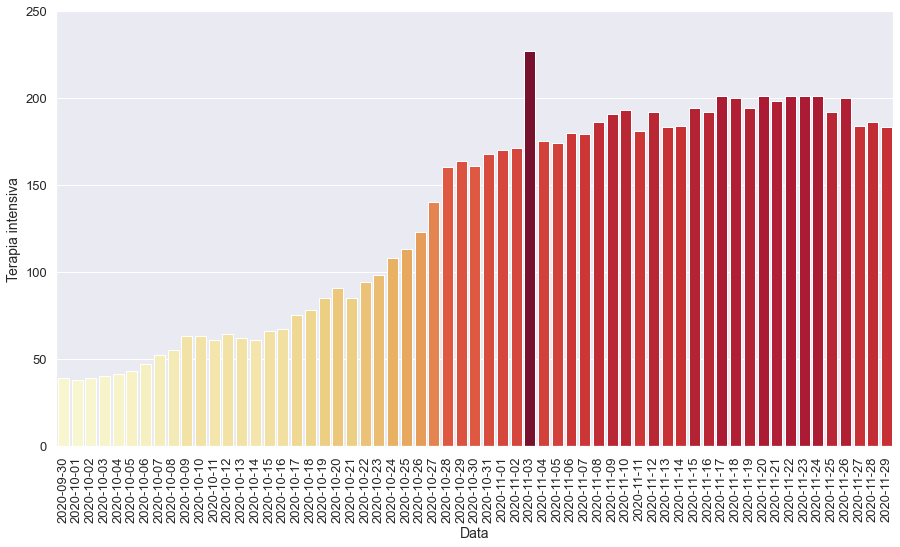

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

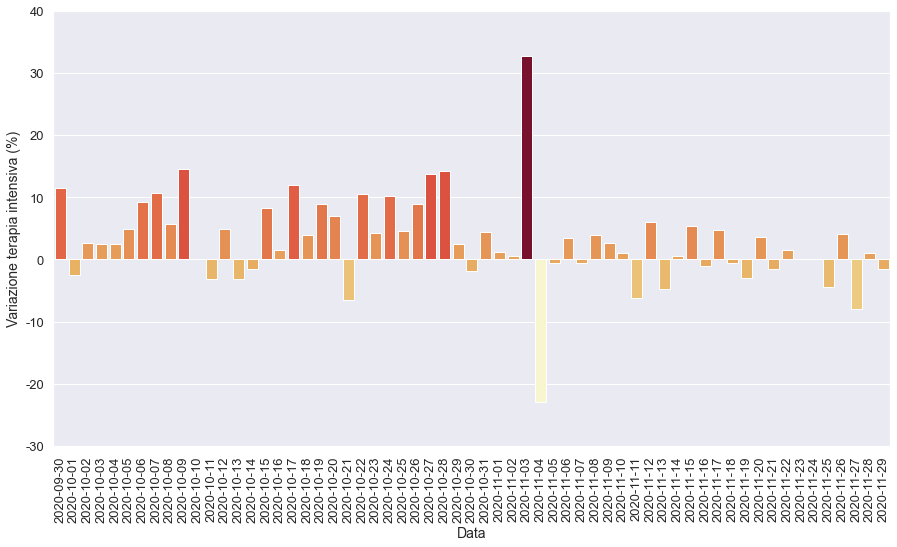

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

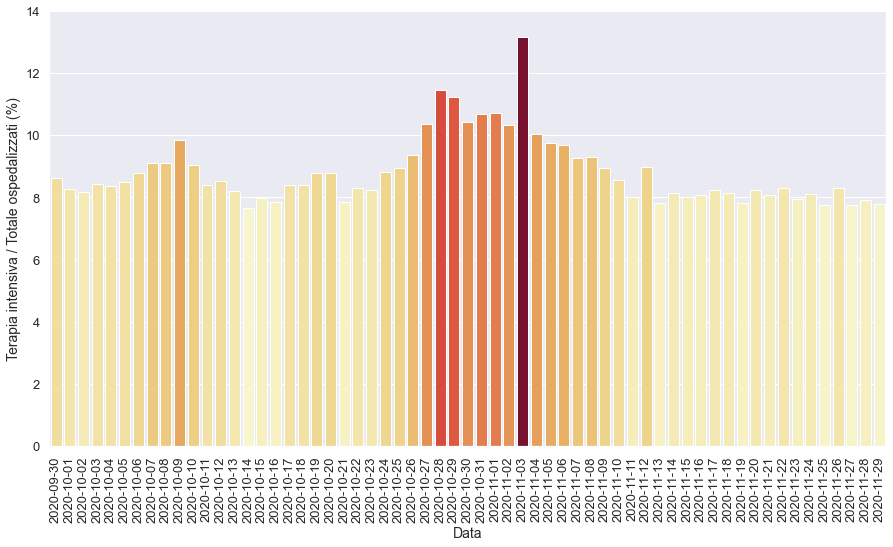

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

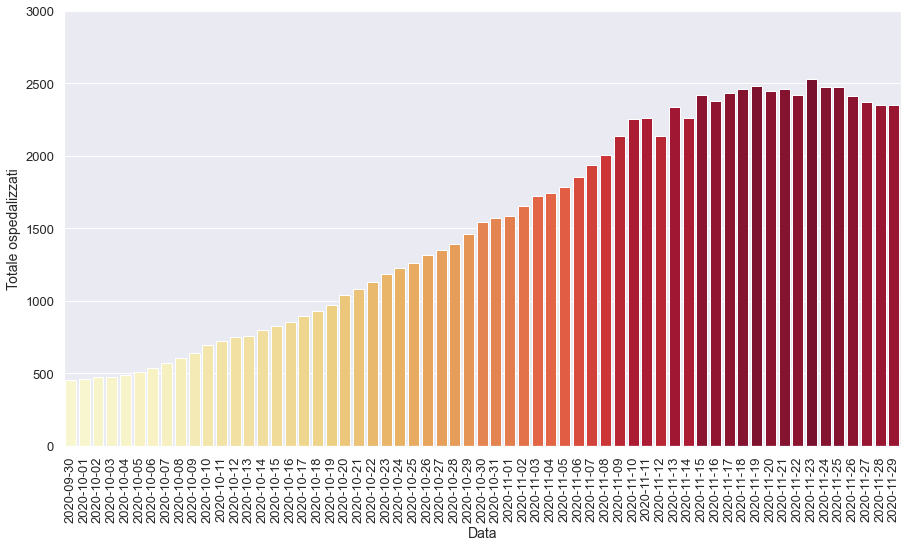

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

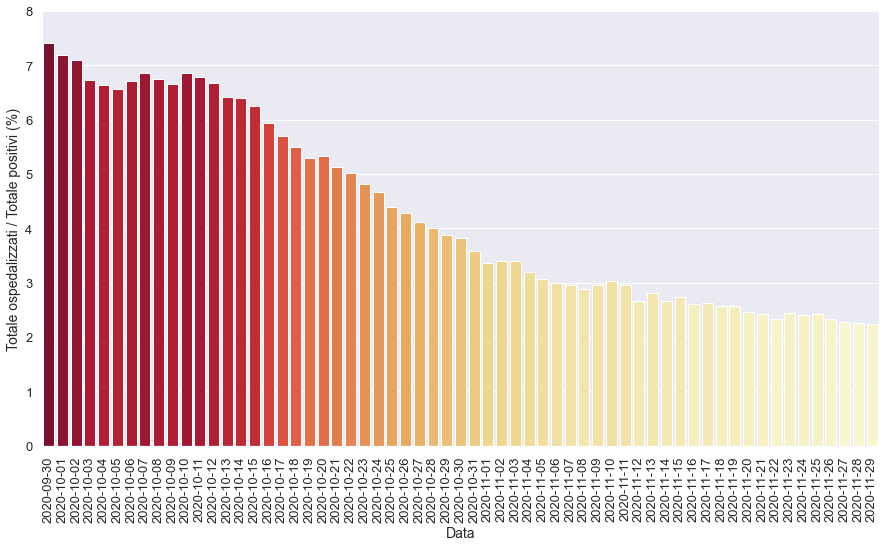

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

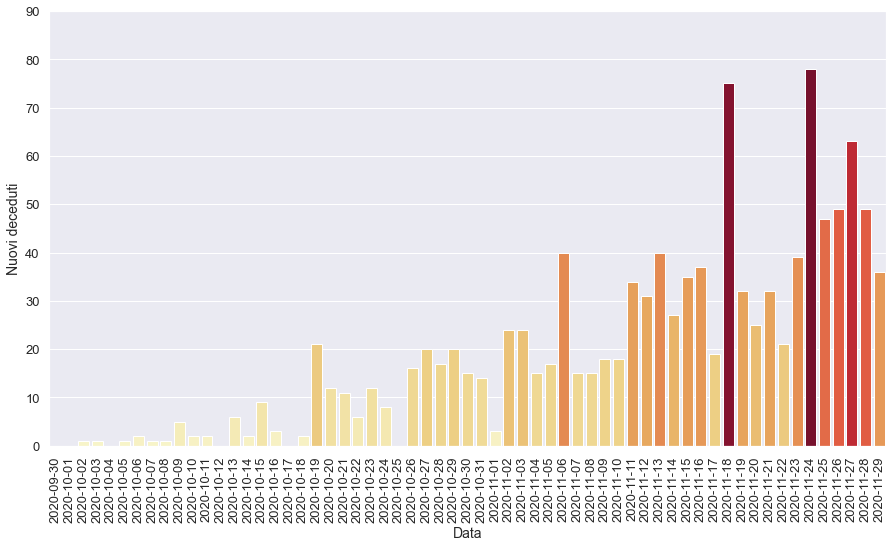

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

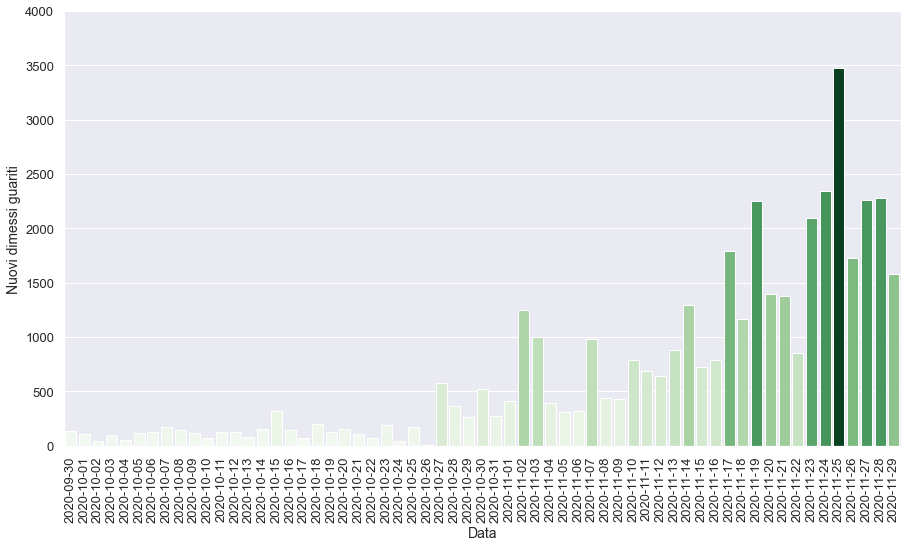

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-30T17:00:00,15,Campania,1385,161,1546,38804,40350,2646,3186,...,15.0,18656.0,12453.0,2561.0,10.41,3.83,17.08,25.58,-1.83,7.02
1,2020-10-31T17:00:00,15,Campania,1403,168,1571,42159,43730,3380,3669,...,14.0,20860.0,16746.0,3355.0,10.69,3.59,17.59,21.91,4.35,8.38
2,2020-11-01T17:00:00,15,Campania,1416,170,1586,45592,47178,3448,3860,...,3.0,21785.0,17865.0,3433.0,10.72,3.36,17.72,21.61,1.19,7.88
3,2020-11-02T17:00:00,15,Campania,1486,171,1657,47113,48770,1592,2861,...,24.0,15632.0,10648.0,1521.0,10.32,3.40,18.30,26.87,0.59,3.37
4,2020-11-03T17:00:00,15,Campania,1497,227,1724,48995,50719,1949,2971,...,24.0,13801.0,8469.0,1882.0,13.17,3.40,21.53,35.08,32.75,4.00
5,2020-11-04T17:00:00,15,Campania,1569,175,1744,52744,54488,3769,4181,...,15.0,21684.0,17469.0,3749.0,10.03,3.20,19.28,23.93,-22.91,7.43
6,2020-11-05T17:00:00,15,Campania,1608,174,1782,56266,58048,3560,3888,...,17.0,19568.0,14963.0,3522.0,9.76,3.07,19.87,25.98,-0.57,6.53
7,2020-11-06T17:00:00,15,Campania,1677,180,1857,60339,62196,4148,4508,...,40.0,23897.0,18412.0,4073.0,9.69,2.99,18.86,24.48,3.45,7.15
8,2020-11-07T17:00:00,15,Campania,1756,179,1935,63571,65506,3310,4309,...,15.0,22696.0,17659.0,3232.0,9.25,2.95,18.99,24.40,-0.56,5.32
9,2020-11-08T17:00:00,15,Campania,1817,186,2003,67649,69652,4146,4601,...,15.0,25806.0,21643.0,4078.0,9.29,2.88,17.83,21.26,3.91,6.33


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

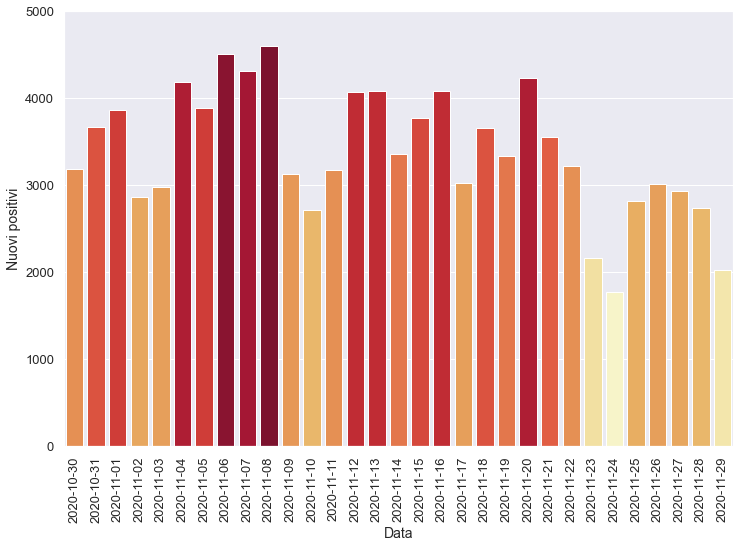

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

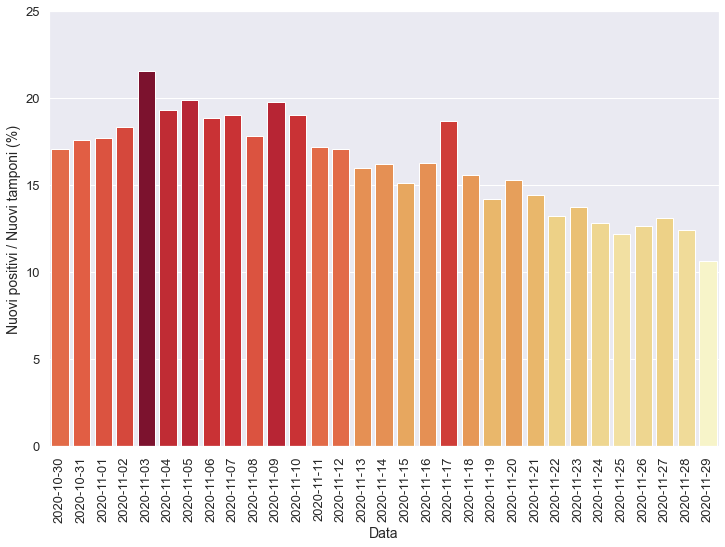

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

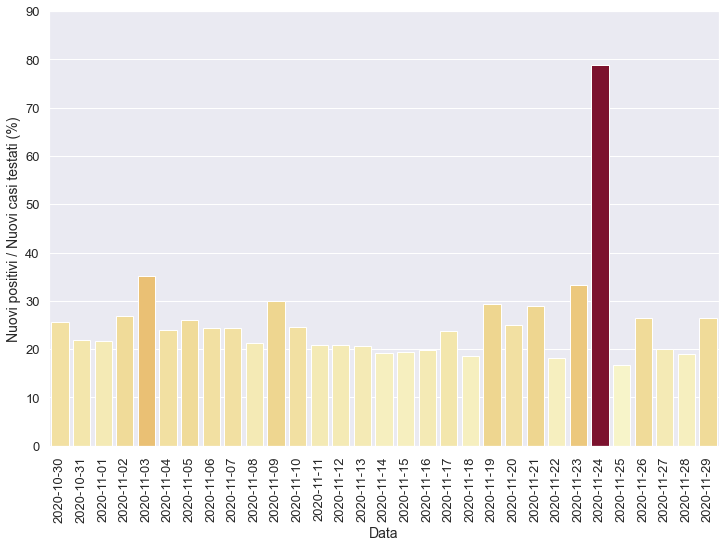

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

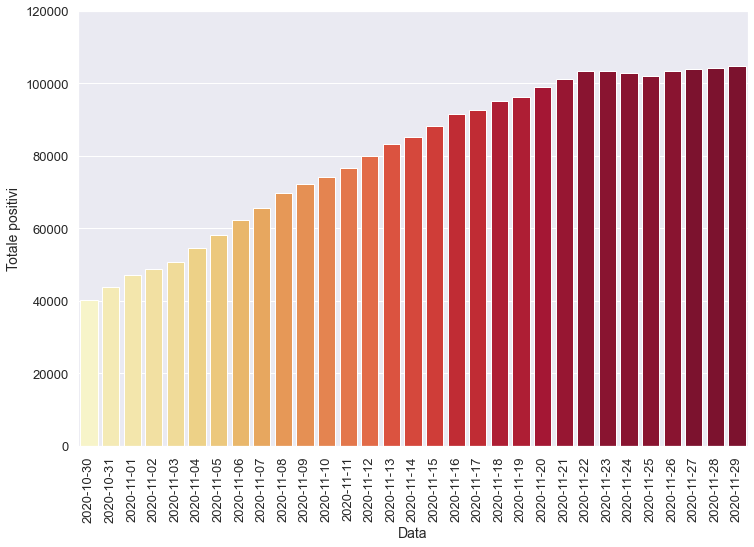

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

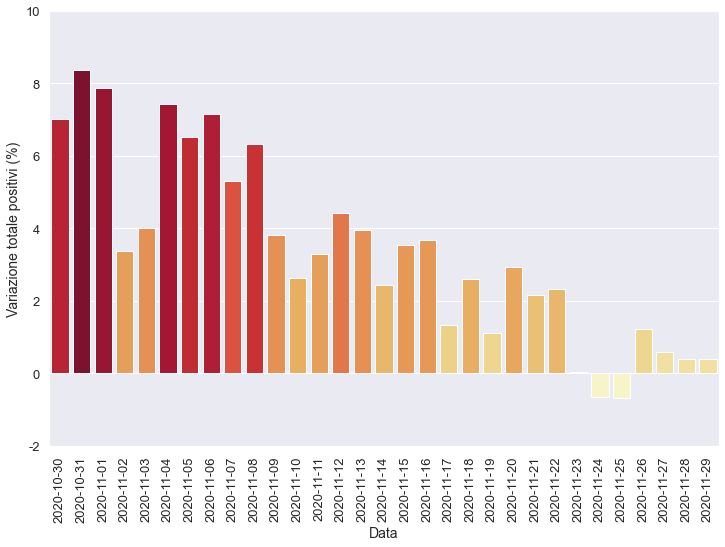

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

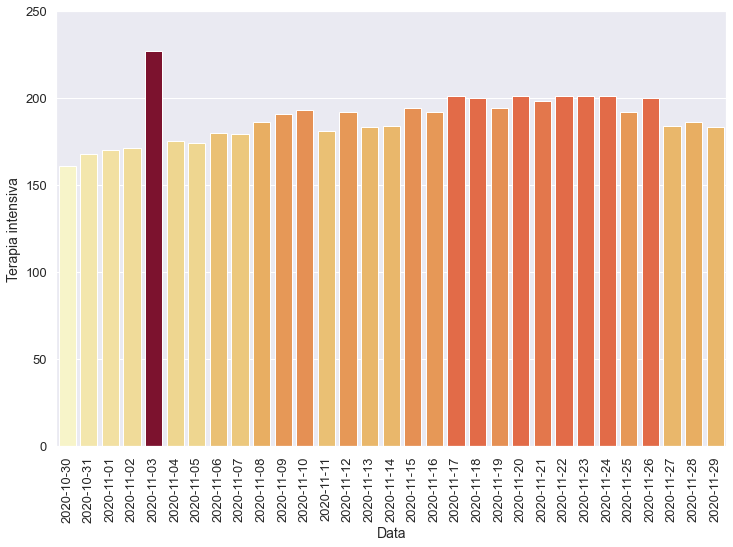

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

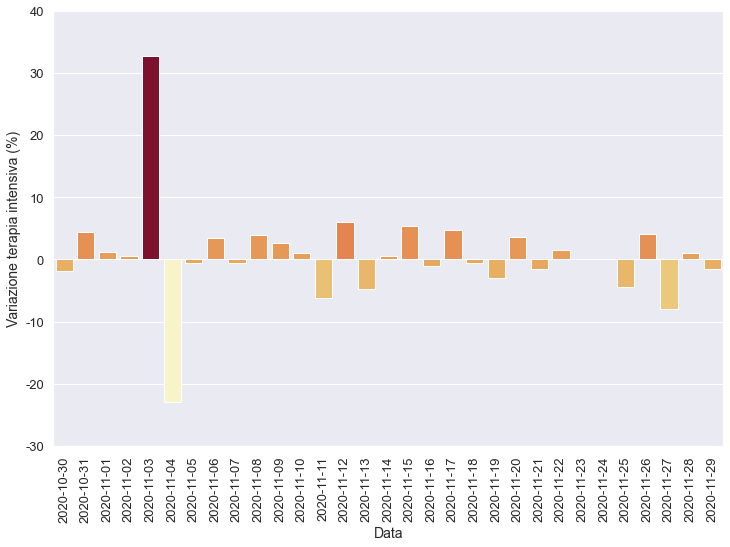

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

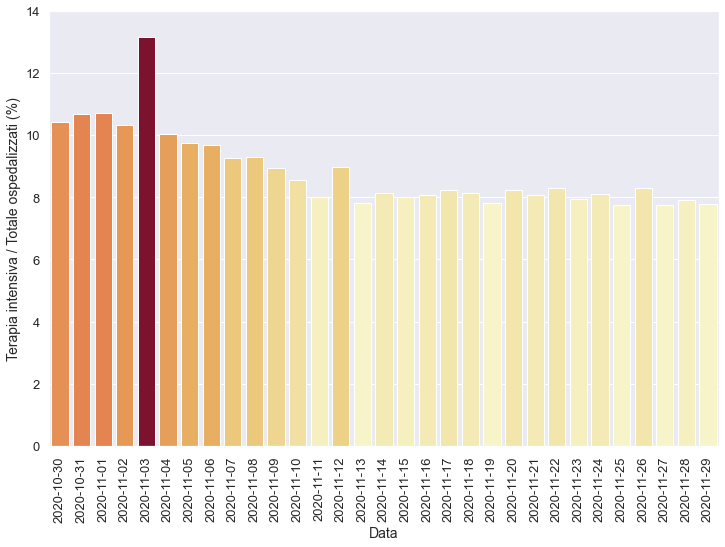

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

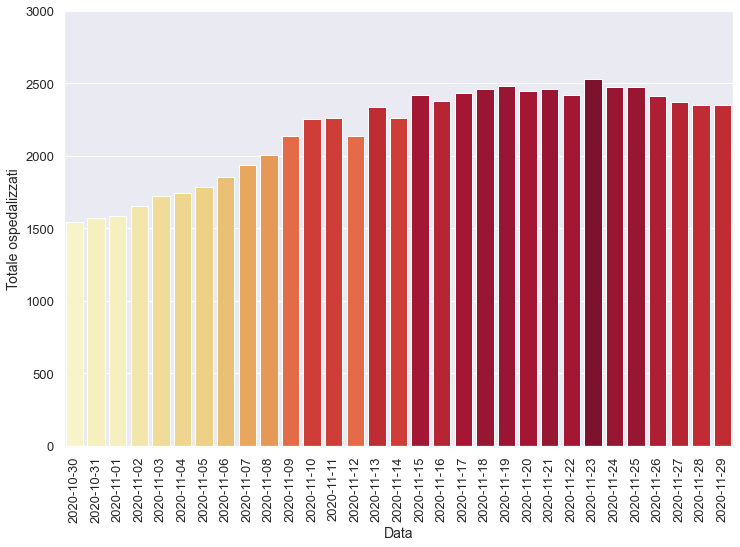

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

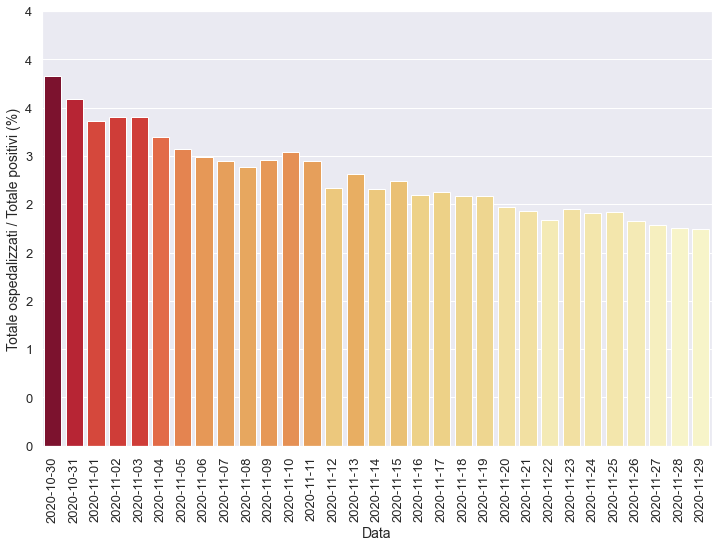

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

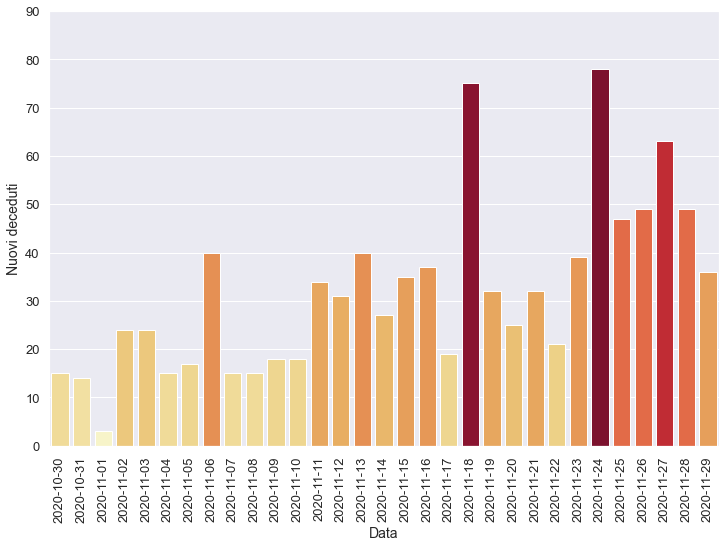

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

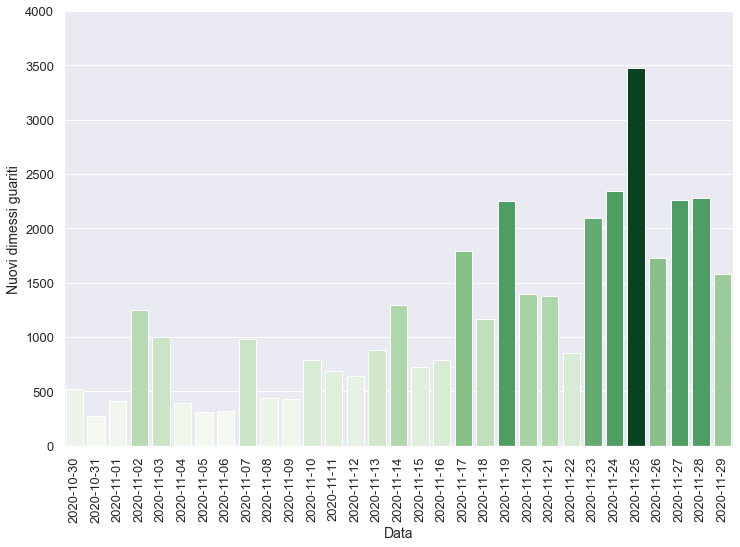

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-22T17:00:00,15,Campania,2218,201,2419,101062,103481,2346,3217,...,21.0,24332.0,17694.0,2385.0,8.31,2.34,13.22,18.18,1.52,2.32
1,2020-11-23T17:00:00,15,Campania,2331,201,2532,100977,103509,28,2158,...,39.0,15739.0,6479.0,-85.0,7.94,2.45,13.71,33.31,0.00,0.03
2,2020-11-24T17:00:00,15,Campania,2274,201,2475,100376,102851,-658,1764,...,78.0,13744.0,2237.0,-601.0,8.12,2.41,12.83,78.86,0.00,-0.64
3,2020-11-25T17:00:00,15,Campania,2282,192,2474,99674,102148,-703,2815,...,47.0,23130.0,16937.0,-702.0,7.76,2.42,12.17,16.62,-4.48,-0.68
4,2020-11-26T17:00:00,15,Campania,2212,200,2412,100972,103384,1236,3008,...,49.0,23761.0,11352.0,1298.0,8.29,2.33,12.66,26.50,4.17,1.21
5,2020-11-27T17:00:00,15,Campania,2188,184,2372,101610,103982,598,2924,...,63.0,22301.0,14597.0,638.0,7.76,2.28,13.11,20.03,-8.00,0.58
6,2020-11-28T17:00:00,15,Campania,2164,186,2350,102033,104383,401,2729,...,49.0,22007.0,14374.0,423.0,7.91,2.25,12.40,18.99,1.09,0.39
7,2020-11-29T17:00:00,15,Campania,2165,183,2348,102438,104786,403,2022,...,36.0,19063.0,7645.0,405.0,7.79,2.24,10.61,26.45,-1.61,0.39


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

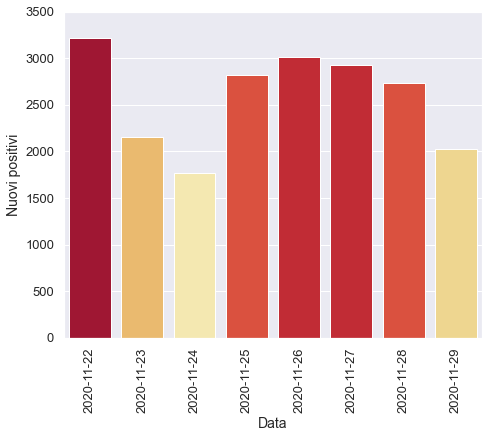

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

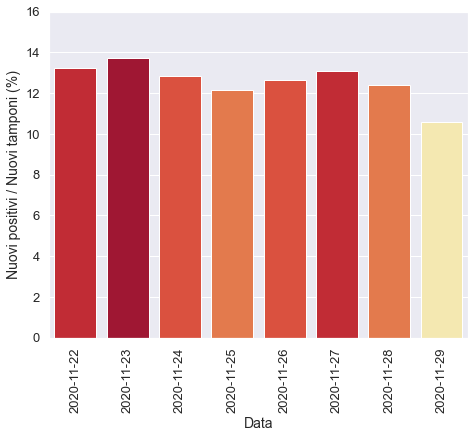

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

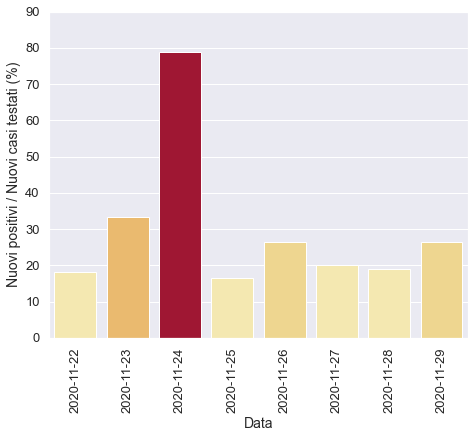

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

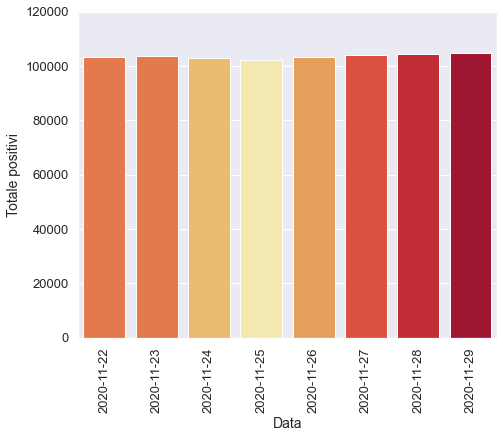

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

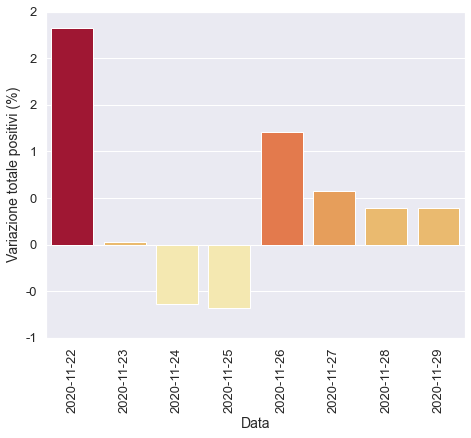

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

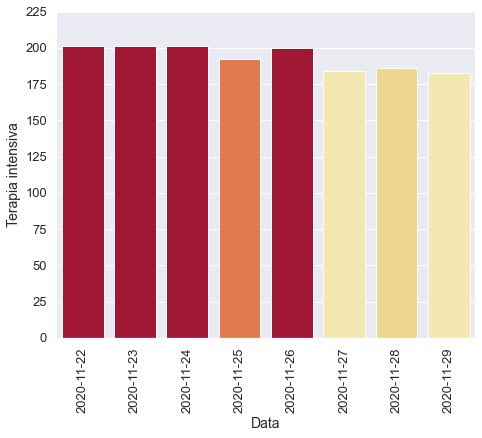

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

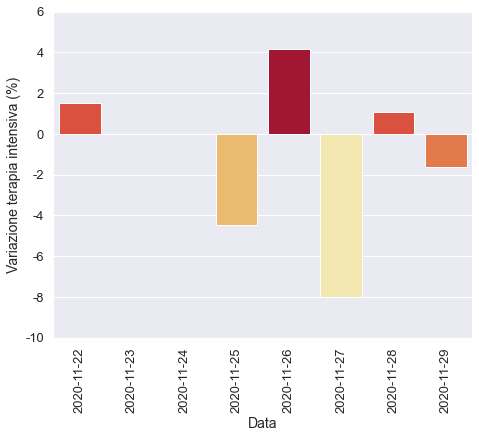

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

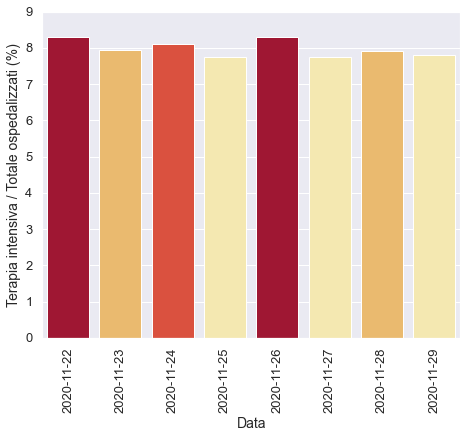

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

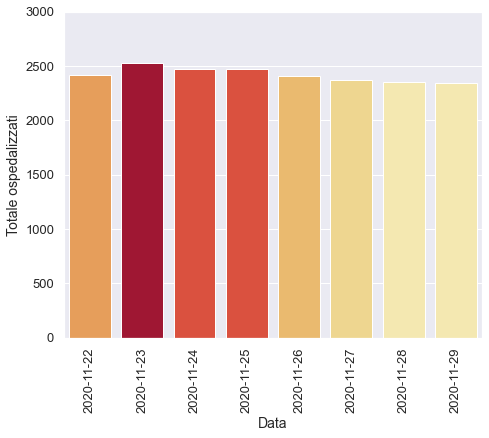

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

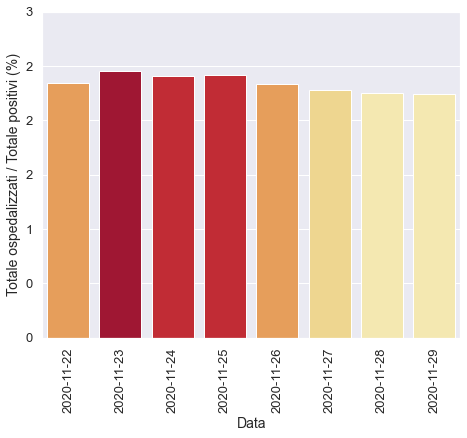

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

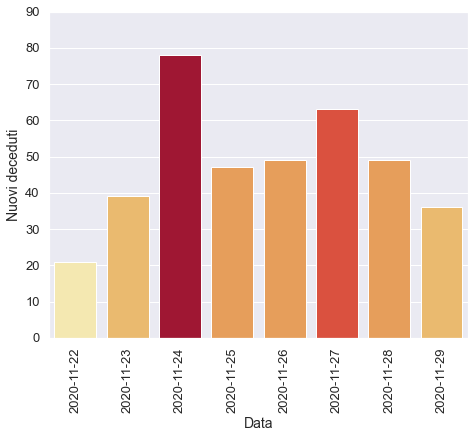

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

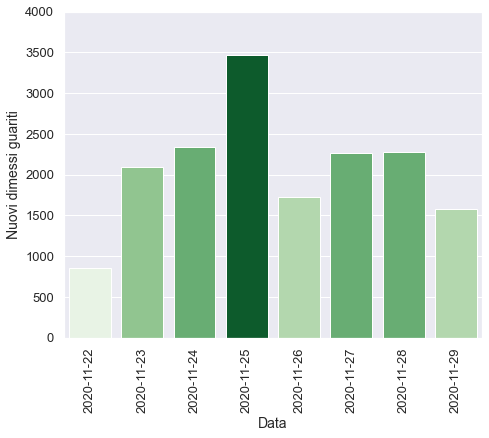

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)